https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/spotify_songs.csv

# **Library**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

In [ ]:
!tar xf spark-3.5.1-bin-hadoop3.tgz

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark
from pyspark.sql import functions as F
from pyspark.sql.functions import col, to_date, mean, year
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [ ]:
!wget https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv

--2024-12-27 07:13:01--  https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7971379 (7.6M) [text/plain]
Saving to: ‘spotify_songs.csv’

spotify_songs.csv   100%[===================>]   7.60M  --.-KB/s    in 0.02s   

2024-12-27 07:13:02 (369 MB/s) - ‘spotify_songs.csv’ saved [7971379/7971379]



In [ ]:
!ls

sample_data  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz  spotify_songs.csv


# **Informasi Dataset**

In [ ]:
df = spark.read.csv('spotify_songs.csv', header=True, sep=",")
df.show(5)

+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|            track_id|          track_name|    track_artist|track_popularity|      track_album_id|    track_album_name|track_album_release_date|playlist_name|         playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|
+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|6f807x0im

In [ ]:
# Menampilkan 10 data pertama
df.show(10, truncate=False)

+----------------------+-----------------------------------------------------+----------------+----------------+----------------------+-----------------------------------------------------+------------------------+-------------+----------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|track_id              |track_name                                           |track_artist    |track_popularity|track_album_id        |track_album_name                                     |track_album_release_date|playlist_name|playlist_id           |playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |duration_ms|
+----------------------+-----------------------------------------------------+----------------+----------------+----------------------+-----------------------------------------------------+-------

In [ ]:
# Menghitung jumlah baris dalam DataFrame
row_count = df.count()
print(f"Jumlah data: {row_count}")

Jumlah data: 32833


In [ ]:
# Menampilkan jumlah kolom dan nama kolom pada DataFrame
column_count = len(df.columns)
column_names = df.columns
print(f"Jumlah kolom: {column_count}")
print("Nama-nama kolom:", column_names)

Jumlah kolom: 23
Nama-nama kolom: ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [ ]:
# Menampilkan informasi dasar DataFrame
print("Informasi DataFrame:")
df.printSchema()

Informasi DataFrame:
root
 |-- track_id: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- track_artist: string (nullable = true)
 |-- track_popularity: string (nullable = true)
 |-- track_album_id: string (nullable = true)
 |-- track_album_name: string (nullable = true)
 |-- track_album_release_date: string (nullable = true)
 |-- playlist_name: string (nullable = true)
 |-- playlist_id: string (nullable = true)
 |-- playlist_genre: string (nullable = true)
 |-- playlist_subgenre: string (nullable = true)
 |-- danceability: string (nullable = true)
 |-- energy: string (nullable = true)
 |-- key: string (nullable = true)
 |-- loudness: string (nullable = true)
 |-- mode: string (nullable = true)
 |-- speechiness: string (nullable = true)
 |-- acousticness: string (nullable = true)
 |-- instrumentalness: string (nullable = true)
 |-- liveness: string (nullable = true)
 |-- valence: string (nullable = true)
 |-- tempo: string (nullable = true)
 |-- duration_ms: strin

**Menampilkan playlist yang paling banyak diputar**

In [ ]:
# Menampilkan playlist_genre
most_playlist_genre = df.groupBy("playlist_genre").count().orderBy("count", ascending=False).first()
print(f"Playlist genre yang paling banyak diputar: {most_playlist_genre['playlist_genre']}")

Playlist genre yang paling banyak diputar: edm


In [ ]:
# Menampilkan playlist_name
most_playlist_name = df.groupBy("playlist_name").count().orderBy("count", ascending=False).first()
print(f"Playlist name yang paling banyak diputar: {most_playlist_name['playlist_name']}")

Playlist name yang paling banyak diputar: Indie Poptimism


**Menampilkan jumlah playlist yang diputar**

In [ ]:
# Mengambil hanya kolom 'count' dari DataFrame atau Series most_playlist_genre
most_playlist_genre = most_playlist_genre['count']

# Menampilkan jumlah playlist genre yang diputar dalam format string
print(f"Jumlah playlist genre yang diputar: {most_playlist_genre}")


Jumlah playlist genre yang diputar: 6042


In [ ]:
most_playlist_name = most_playlist_name['count']

# Menampilkan jumlah playlist name yang diputar dalam format string
print(f"Jumlah playlist name yang diputar: {most_playlist_name}")

Jumlah playlist name yang diputar: 308


**Isi kolom track_name dan track_artist pada playlist genre terbanyak diputar**

In [ ]:
# Menemukan genre yang paling banyak diputar
most_playlist_genre = df.groupBy("playlist_genre").count().orderBy("count", ascending=False).first()

# Mengambil track_name dan track_artist untuk genre tersebut
tracks_in_most_genre = df.filter(df.playlist_genre == most_playlist_genre['playlist_genre']) \
                          .select("track_name", "track_artist") \
                          .distinct()

# Menambahkan kolom baru ke DataFrame dengan genre yang paling banyak diputar
tracks_with_genre = tracks_in_most_genre.withColumn("most_played_genre", F.lit(most_playlist_genre['playlist_genre']))

# Menampilkan hasil
print(f"Isi kolom track_name, track_artist, dan genre '{most_playlist_genre['playlist_genre']}' yang terbanyak diputar:")
tracks_with_genre.show(truncate=False)

Isi kolom track_name, track_artist, dan genre 'edm' yang terbanyak diputar:
+---------------------------------------------------------+-------------------------+-----------------+
|track_name                                               |track_artist             |most_played_genre|
+---------------------------------------------------------+-------------------------+-----------------+
|Outlaw                                                   |Bassjackers              |edm              |
|Koi                                                      |Furia                    |edm              |
|The Walker                                               |Roberto Capuano          |edm              |
|Goliath                                                  |Dyro                     |edm              |
|Sun Is Never Going Down (feat. Dawn Golden)              |Martin Garrix            |edm              |
|Underground                                              |bad nelson               |edm    

# **Pembersihan Data**

In [ ]:
df = spark.read.csv('/content/spotify_songs.csv', header=True, sep=',', inferSchema=True)
df.show()

+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|            track_id|          track_name|    track_artist|track_popularity|      track_album_id|    track_album_name|track_album_release_date|playlist_name|         playlist_id|playlist_genre|playlist_subgenre|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|duration_ms|
+--------------------+--------------------+----------------+----------------+--------------------+--------------------+------------------------+-------------+--------------------+--------------+-----------------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+-----------+
|6f807x0im

## **Konversi Tipe Data**

In [ ]:
# Konversi kolom numerik dari string ke float
numerical_columns = [
    "track_popularity", "danceability", "energy", "loudness", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"
]

for column in numerical_columns:
    df = df.withColumn(column, col(column).cast("float"))


## **Konversi Tanggal**

In [ ]:
# Konversi kolom tanggal menjadi format tanggal
df = df.withColumn("track_album_release_date", to_date(col("track_album_release_date"), "yyyy-MM-dd"))

In [ ]:
# Ekstraksi tahun dari tanggal rilis
df = df.withColumn("release_year", year(col("track_album_release_date")))

## **Penanganan Nilai Hilang**

In [ ]:
# Mengisi nilai hilang untuk kolom numerik dengan rata-rata
for column in numerical_columns:
    mean_value = df.select(mean(col(column))).collect()[0][0]
    df = df.fillna({column: mean_value})

# Mengisi nilai hilang untuk kolom kategorikal
categorical_columns = ["track_name", "track_artist", "playlist_genre", "playlist_subgenre"]
for column in categorical_columns:
    df = df.fillna({column: "Unknown"})


In [ ]:
# Statistik deskriptif untuk kolom numerik
df.describe(numerical_columns).show()

+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+
|summary|  track_popularity|       danceability|             energy|         loudness|        speechiness|       acousticness|   instrumentalness|           liveness|            valence|             tempo|       duration_ms|
+-------+------------------+-------------------+-------------------+-----------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+
|  count|             32833|              32833|              32833|            32833|              32833|              32833|              32833|              32833|              32833|             32833|             32833|
|   mean|42.477080985593766| 0.6548413911705183| 0.6987159027982406|-6.71496034282698|0.107282420188

## **Ringkasan Berdasarkan Genre**

In [ ]:
# Mengelompokkan data berdasarkan kolom "playlist_genre"
genre_summary = df.groupBy("playlist_genre").agg(
    # Menghitung rata-rata popularitas lagu untuk setiap genre
    mean("track_popularity").alias("avg_popularity"),
    # Menghitung rata-rata nilai "danceability" untuk setiap genre
    mean("danceability").alias("avg_danceability"),
    # Menghitung rata-rata nilai "energy" untuk setiap genre
    mean("energy").alias("avg_energy"),
    # Menghitung rata-rata nilai "valence" untuk setiap genre
    mean("valence").alias("avg_valence"),
    # Menghitung rata-rata nilai "tempo" untuk setiap genre
    mean("tempo").alias("avg_tempo")
).orderBy("avg_popularity", ascending=False)  # Mengurutkan hasil berdasarkan rata-rata popularitas secara menurun

# Menampilkan hasil ringkasan data untuk setiap genre
genre_summary.show()


+--------------------+------------------+------------------+------------------+-------------------+-------------------+
|      playlist_genre|    avg_popularity|  avg_danceability|        avg_energy|        avg_valence|          avg_tempo|
+--------------------+------------------+------------------+------------------+-------------------+-------------------+
|37i9dQZF1DWTDafB3...|              81.0|0.6548413634300232|0.7429999709129333|0.10300000011920929| 0.5720000267028809|
|                 pop| 47.75317835088994|0.6392583545639737|0.7010759786701678|  0.503456101934143| 120.73805722417808|
|               latin|47.026576139670226|0.7132872549049144|0.7083124689275112| 0.6055104262745812|  118.6223536471969|
|                 rap| 43.21545422902889|0.7183527669740022|0.6507084060854512| 0.5050900106198678| 120.65490755717845|
|                rock| 41.72833770955363|0.5205479704311606|0.7328132704153154| 0.5373520502872152| 124.98878584252876|
|                 r&b| 41.26286662977311

# **EDA**

## **Analisis Tren Waktu**

In [ ]:
# Menambahkan kolom baru "release_year" ke DataFrame, yang berisi tahun dari kolom "track_album_release_date"
df = df.withColumn("release_year", year(col("track_album_release_date")))

# Mengelompokkan data berdasarkan tahun rilis dan menghitung popularitas rata-rata per tahun
popularity_by_year = df.groupBy("release_year").agg(
    # Menghitung rata-rata popularitas lagu untuk setiap tahun dan memberi alias "avg_popularity"
    mean("track_popularity").alias("avg_popularity")
).orderBy("release_year")  # Mengurutkan hasil berdasarkan "release_year" dalam urutan naik

# Mengonversi DataFrame Spark menjadi DataFrame Pandas untuk analisis atau visualisasi lebih lanjut
popularity_by_year_pd = popularity_by_year.toPandas()


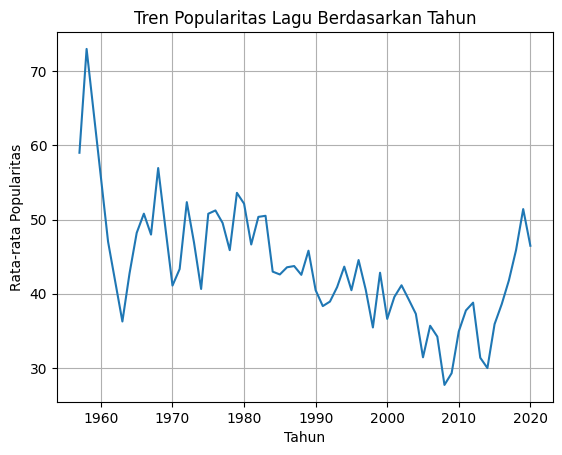

In [ ]:
# Plot tren waktu
plt.plot(popularity_by_year_pd["release_year"], popularity_by_year_pd["avg_popularity"])
plt.title("Tren Popularitas Lagu Berdasarkan Tahun")
plt.xlabel("Tahun")
plt.ylabel("Rata-rata Popularitas")
plt.grid()
plt.show()


Grafik diatas menggambarkan tren rata-rata popularitas lagu berdasarkan tahun rilis.

1.   **Periode Awal (Sebelum 1960-an)**: Popularitas rata-rata lagu mencapai puncaknya sekitar tahun 1960, dengan skor popularitas lebih dari 70. Setelah itu, terjadi penurunan tajam pada awal 1960-an.

2.   **Fluktuasi (1960-an hingga 1980-an)**: Pada rentang waktu 1960-an hingga 1980-an, terlihat fluktuasi yang signifikan pada rata-rata popularitas. Meskipun terdapat beberapa peningkatan pada periode tertentu, popularitas rata-rata tetap berada di kisaran 40-50.

3.   **Stabilitas dan Penurunan (1990-an hingga 2010)**:
Pada rentang tahun 1990-an hingga awal 2010-an, popularitas rata-rata mengalami tren penurunan dan cenderung stabil pada skor 30-40. Perubahan preferensi musik atau karakteristik data yang berbeda untuk lagu yang dirilis selama periode.
4.   **Peningkatan Kembali (Setelah 2010)**:
Setelah tahun 2010, rata-rata popularitas lagu kembali meningkat, mencapai lebih dari 50 pada akhir dekade 2010-an hingga 2020.

## **Korelasi Antar Fitur Numerik**

In [ ]:
# Membuat dictionary kosong untuk menyimpan hasil korelasi antara pasangan fitur numerik
correlations = {}

# Menggunakan dua loop untuk menghitung korelasi antara semua pasangan fitur numerik
for column1 in numerical_columns:
    for column2 in numerical_columns:
        if column1 != column2:  # Mengecualikan perhitungan korelasi fitur terhadap dirinya sendiri
            # Menghitung korelasi Pearson antara fitur column1 dan column2
            corr_value = df.stat.corr(column1, column2)
            # Menyimpan pasangan fitur dan nilai korelasi dalam dictionary
            correlations[(column1, column2)] = corr_value

# Menampilkan hasil korelasi untuk semua pasangan fitur numerik
for key, value in correlations.items():
    print(f"Korelasi antara {key[0]} dan {key[1]}: {value:.2f}")


Korelasi antara track_popularity dan danceability: 0.06
Korelasi antara track_popularity dan energy: -0.11
Korelasi antara track_popularity dan loudness: 0.06
Korelasi antara track_popularity dan speechiness: 0.01
Korelasi antara track_popularity dan acousticness: 0.09
Korelasi antara track_popularity dan instrumentalness: -0.15
Korelasi antara track_popularity dan liveness: -0.05
Korelasi antara track_popularity dan valence: 0.03
Korelasi antara track_popularity dan tempo: -0.00
Korelasi antara track_popularity dan duration_ms: -0.14
Korelasi antara danceability dan track_popularity: 0.06
Korelasi antara danceability dan energy: -0.09
Korelasi antara danceability dan loudness: 0.03
Korelasi antara danceability dan speechiness: 0.18
Korelasi antara danceability dan acousticness: -0.02
Korelasi antara danceability dan instrumentalness: -0.01
Korelasi antara danceability dan liveness: -0.11
Korelasi antara danceability dan valence: 0.33
Korelasi antara danceability dan tempo: -0.18
Korel

## **Visualisasi Korelasi Antar Fitur Numerik**

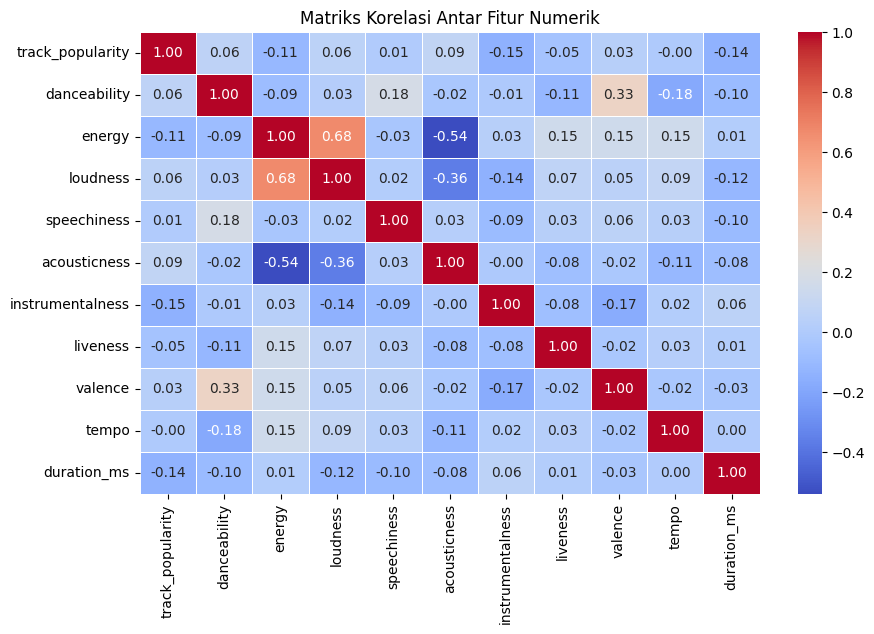

In [ ]:
# Menghitung matriks korelasi dan mengonversi ke Pandas
correlation_matrix = df.select(numerical_columns).toPandas().corr()

# Membuat heatmap dari korelasi antar fitur
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()


## **Distribusi Popularitas Berdasarkan Genre**

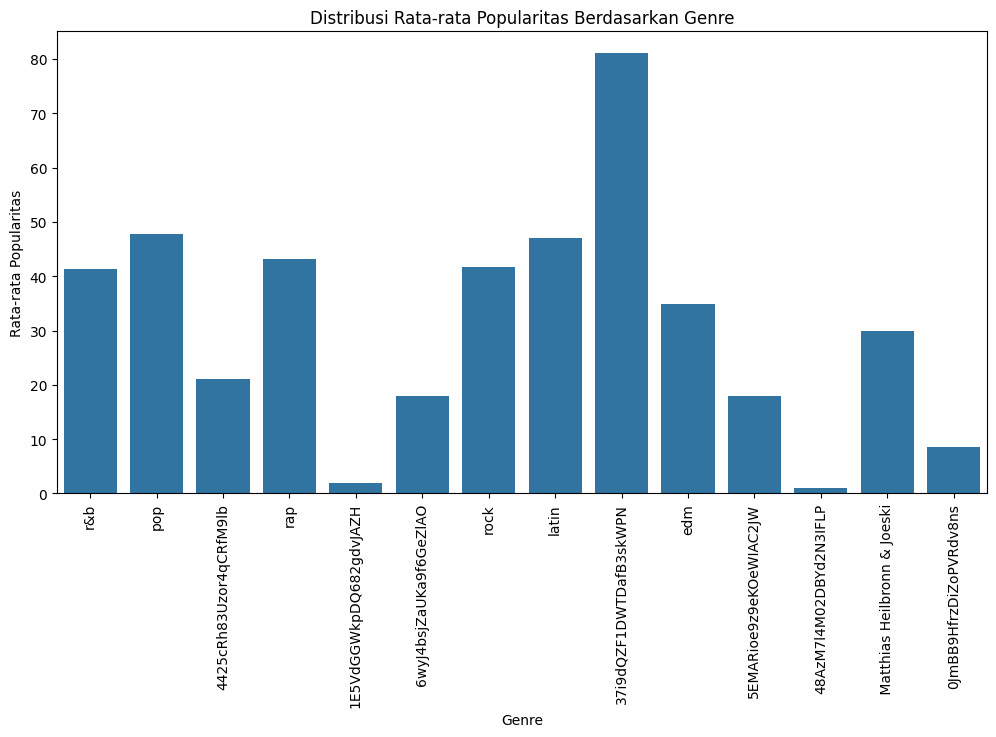

In [ ]:
# Menghitung rata-rata popularitas berdasarkan genre
genre_popularity = df.groupBy("playlist_genre").agg(mean("track_popularity").alias("avg_popularity"))

# Mengonversi ke Pandas untuk visualisasi
genre_popularity_pd = genre_popularity.toPandas()

# Plot distribusi popularitas berdasarkan genre
plt.figure(figsize=(12, 6))
sns.barplot(x="playlist_genre", y="avg_popularity", data=genre_popularity_pd)
plt.xticks(rotation=90)
plt.title("Distribusi Rata-rata Popularitas Berdasarkan Genre")
plt.xlabel("Genre")
plt.ylabel("Rata-rata Popularitas")
plt.show()


Visualisasi ini dapat membantu untuk mengidentifikasi genre mana yang memiliki rata-rata popularitas tertinggi dan mana yang lebih rendah. Ada beberapa genre dengan label yang kurang deskriptif atau menggunakan ID unik.
Jadi genre latin adalah yang memiliki popularitas tertinggi. Kemudian genre dengaan popularitas rendah mungkin memiliki lagu-lagu yang kurang dikenal atau segmentasi pasar yang lebih kecil.




## **Analisis Tren Berdasarkan Fitur Audio (Energy dan Danceability)**

+-------+-------------------+-------------------+------------------+
|summary|       danceability|             energy|  track_popularity|
+-------+-------------------+-------------------+------------------+
|  count|              32833|              32833|             32833|
|   mean| 0.6548413911705183| 0.6987159027982406|42.477080985593766|
| stddev|0.14505431350094083|0.18083697239737226|24.984074486186916|
|    min|                0.0|            1.75E-4|               0.0|
|    max|              0.983|                1.0|             100.0|
+-------+-------------------+-------------------+------------------+



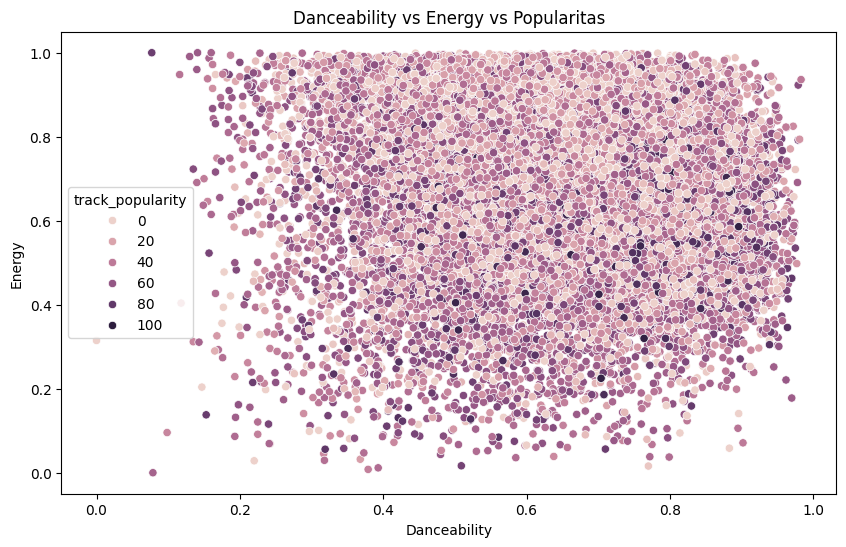

In [ ]:
# Korelasi antara Energy dan Danceability dengan Popularitas
df.select("danceability", "energy", "track_popularity").describe().show()

# Plot distribusi Danceability vs Energy untuk visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x="danceability", y="energy", hue="track_popularity", data=df.toPandas())
plt.title("Danceability vs Energy vs Popularitas")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()




*   Danceability dan energy berkontribusi pada karakteristik lagu, tetapi popularitas tidak hanya dipengaruhi oleh kedua faktor tersebut.
*   Visualisasi ini memberikan gambaran menyeluruh tentang distribusi lagu dalam hal danceability, energy, dan bagaimana popularitas tersebar di antara kombinasi ini.



## New Section

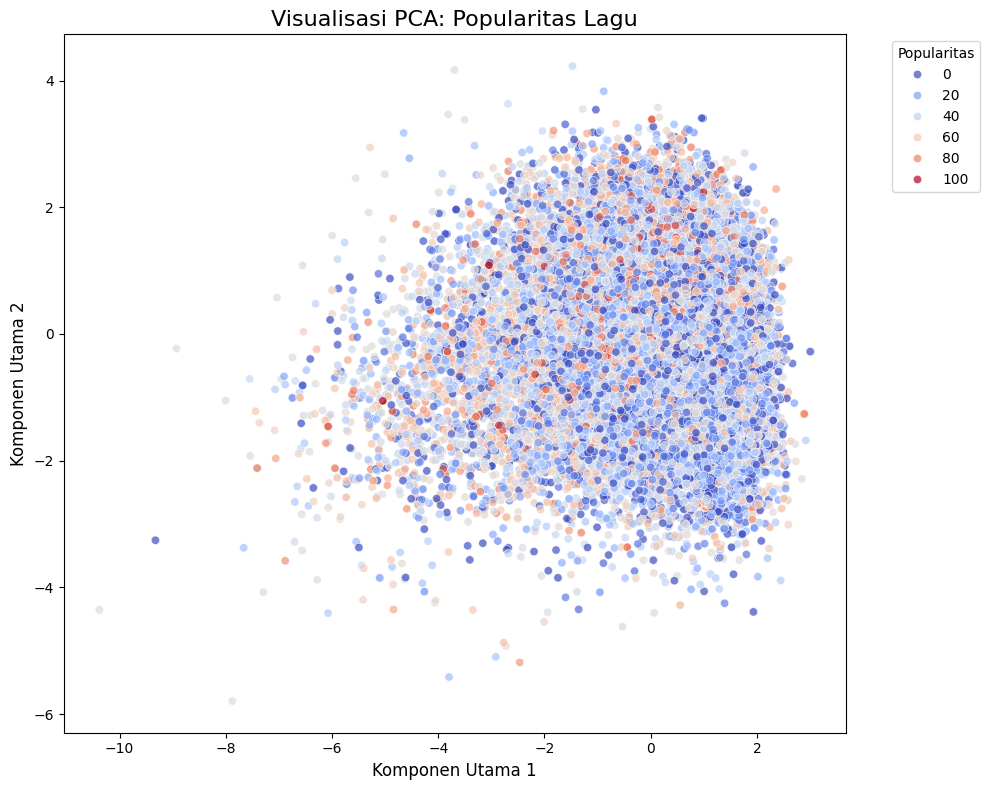

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih fitur numerik untuk PCA
numeric_features = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]
data = df.select(numeric_features + ["track_popularity"]).toPandas()

# Normalisasi data untuk PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_features])

# Lakukan PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
data["pca_1"] = pca_result[:, 0]
data["pca_2"] = pca_result[:, 1]

# Visualisasi PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="pca_1",
    y="pca_2",
    hue="track_popularity",
    palette="coolwarm",
    alpha=0.7,
    data=data
)
plt.title("Visualisasi PCA: Popularitas Lagu", fontsize=16)
plt.xlabel("Komponen Utama 1", fontsize=12)
plt.ylabel("Komponen Utama 2", fontsize=12)
plt.legend(title="Popularitas", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Visualisasi ini menunjukkan bagaimana lagu-lagu dengan berbagai tingkatan popularitas tersebar dalam ruang dimensi yang dihasilkan PCA (Principal Component Analysis). Lagu dengan popularitas tertinggi ditunjukkan oleh warna merah, menunjukkan bahwa fitur numerik tertentu memiliki hubungan yang kuat dengan popularitas. Sebaliknya, jika warna tersebar merata, berarti fitur yang digunakan tidak cukup untuk memprediksi popularitas dengan baik.

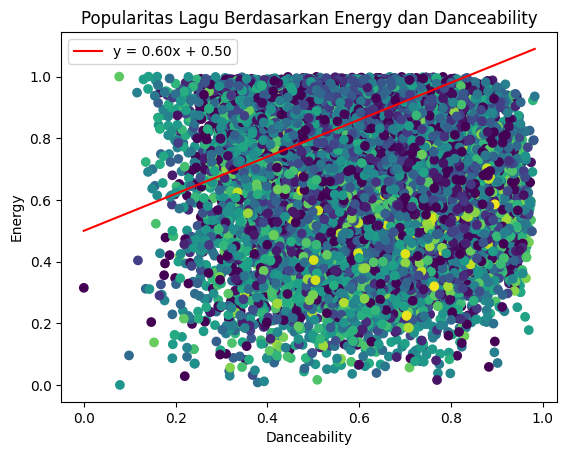

In [ ]:
data_ordinal = data

plt.scatter(data_ordinal["danceability"], data_ordinal["energy"], c=data_ordinal["track_popularity"], cmap="viridis")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Popularitas Lagu Berdasarkan Energy dan Danceability")  # Tambahkan judul

# Estimasi garis pemisah
slope_1, intercept_1 = 0.6, 0.5  # Estimasi slope dan intersep
x_vals_1 = [min(data_ordinal["danceability"]), max(data_ordinal["danceability"])]
y_vals_1 = [slope_1 * x + intercept_1 for x in x_vals_1]

plt.plot(x_vals_1, y_vals_1, color='red', label=f'y = {slope_1:.2f}x + {intercept_1:.2f}')
plt.legend()
plt.show()


## Klasterisasi Berdasarkan Danceability, Energy, dan Track Popularity

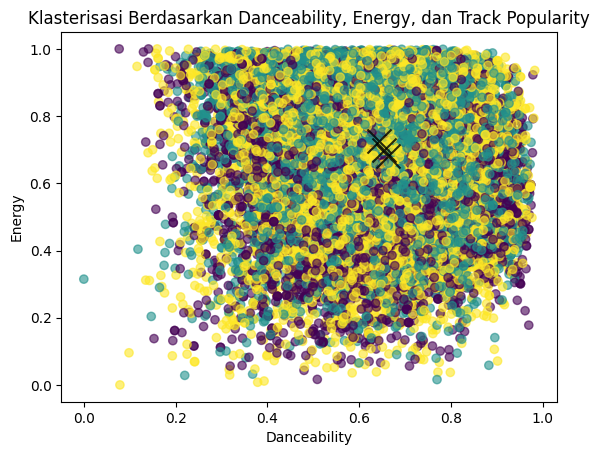

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memperbarui keanggotaan kluster
def update_membership(points, centers):
    distances = np.linalg.norm(points[:, np.newaxis] - centers, axis=2)  # Hitung jarak Euclidean
    clusters = np.argmin(distances, axis=1)  # Pilih indeks centroid terdekat
    return clusters

# Fungsi untuk memperbarui posisi centroid secara manual
def update_centroids(points, clusters, K):
    N, d = points.shape  # Jumlah titik dan dimensi
    centroids = np.zeros((K, d))  # Inisialisasi centroid dengan 0

    for i in range(K):  # Tambahkan koordinat poin ke centroid terkait
        centroids[i] = np.sum(points[clusters == i], axis=0)

    for i in range(K):  # Rata-rata nilai centroid
        centroids[i] /= np.sum(clusters == i)

    return centroids

# Fungsi untuk memplot hasil klasterisasi
def plot_clusters(points, clusters, centers):
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.8, marker='x')
    plt.xlabel('Danceability')
    plt.ylabel('Energy')
    plt.title('Klasterisasi Berdasarkan Danceability, Energy, dan Track Popularity')
    plt.show()

# Contoh Penggunaan
if __name__ == "__main__":
    # Ambil data danceability, energy, dan track_popularity
    points = data_ordinal[["danceability", "energy", "track_popularity"]].values  # Konversi ke numpy array

    # Inisialisasi centroid acak
    np.random.seed(42)
    K = 3  # Jumlah kluster
    centers = points[np.random.choice(points.shape[0], K, replace=False)]

    # Iterasi algoritma k-means
    for i in range(10):  # Lakukan 10 iterasi
        clusters = update_membership(points, centers)  # Perbarui keanggotaan
        centers = update_centroids(points, clusters, K)  # Perbarui posisi centroid secara manual

    # Plot hasil akhir
    plot_clusters(points[:, :2], clusters, centers[:, :2])  # Hanya visualisasi 2 fitur pertama


Visualisasi ini menunjukkan bagaimana lagu-lagu dapat dikelompokkan berdasarkan danceability, energy, dan popularitas.

## Klasterisasi Berdasarkan Danceability dan Energy

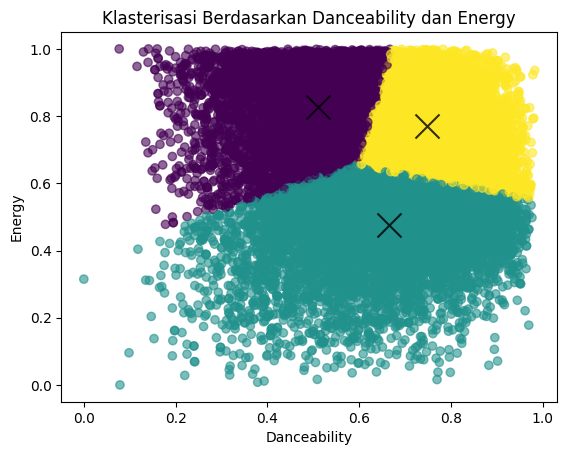

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memperbarui keanggotaan kluster
def update_membership(points, centers):
    distances = np.linalg.norm(points[:, np.newaxis] - centers, axis=2)  # Hitung jarak Euclidean
    clusters = np.argmin(distances, axis=1)  # Pilih indeks centroid terdekat
    return clusters

# Fungsi untuk memperbarui posisi centroid secara manual
def update_centroids(points, clusters, K):
    N, d = points.shape  # Jumlah titik dan dimensi
    centroids = np.zeros((K, d))  # Inisialisasi centroid dengan 0

    for i in range(K):  # Tambahkan koordinat poin ke centroid terkait
        centroids[i] = np.sum(points[clusters == i], axis=0)

    for i in range(K):  # Rata-rata nilai centroid
        centroids[i] /= np.sum(clusters == i)

    return centroids

# Fungsi untuk memplot hasil klasterisasi
def plot_clusters(points, clusters, centers):
    plt.scatter(points[:, 0], points[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.8, marker='x')
    plt.xlabel('Danceability')
    plt.ylabel('Energy')
    plt.title('Klasterisasi Berdasarkan Danceability dan Energy')
    plt.show()

if __name__ == "__main__":
    # Ambil data danceability dan energy
    points = data_ordinal[["danceability", "energy"]].values  # Konversi ke numpy array

    # Inisialisasi centroid acak
    np.random.seed(42)
    K = 3  # Jumlah kluster
    centers = points[np.random.choice(points.shape[0], K, replace=False)]

    # Iterasi algoritma k-means
    for i in range(10):  # Lakukan 10 iterasi
        clusters = update_membership(points, centers)  # Perbarui keanggotaan
        centers = update_centroids(points, clusters, K)  # Perbarui posisi centroid secara manual

    # Plot hasil akhir
    plot_clusters(points, clusters, centers)  # Visualisasi menggunakan hanya dua fitur


Setiap klaster memiliki karakteristik berikut:

*   Klaster kuning (Danceability tinggi, Energy tinggi): Lagu-lagu yang cenderung energik dan sangat cocok untuk aktivitas menari.
*   Klaster ungu (Danceability rendah, Energy tinggi): Lagu-lagu dengan energi tinggi tetapi kurang danceable, mungkin cocok untuk genre tertentu seperti lagu keras atau intens tetapi tidak untuk menari.
*    Klaster hijau toska (Danceability rendah, Energy tinggi): Lagu-lagu dengan energi tinggi tetapi kurang danceable, mungkin cocok untuk suasana santai atau introspektif.

Visualisasi ini membantu dalam melakukan distribusi dan pengelompokan lagu berdasarkan dua karakteristik utama, sehingga memudahkan menyusun playlist, merekomendasikan lagu, atau menganalisis pola preferensi audiens.


## Hubungan antara Tempo dan Popularitas

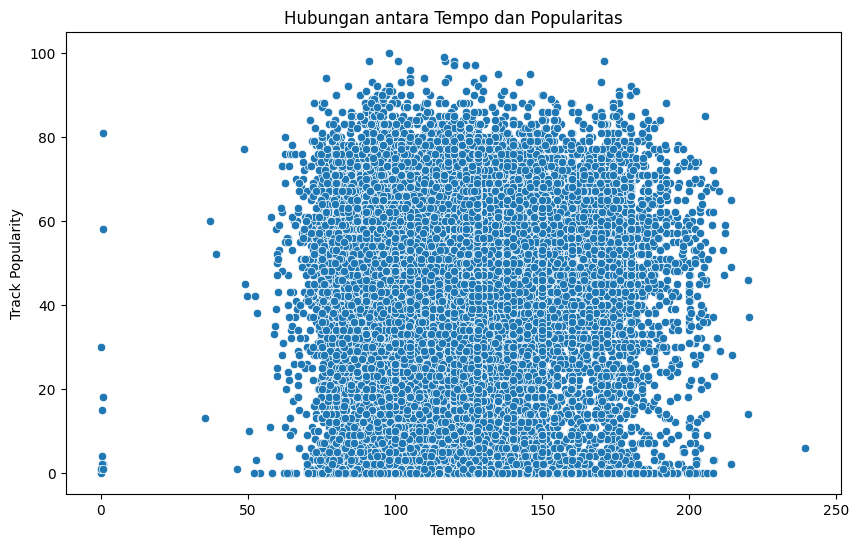

In [ ]:
# Mengambil kolom tempo dan track_popularity
tempo_popularity = df.select("tempo", "track_popularity")

# Mengonversi ke Pandas untuk visualisasi
tempo_popularity_pd = tempo_popularity.toPandas()

# Plot hubungan antara tempo dan popularitas
plt.figure(figsize=(10, 6))
sns.scatterplot(x="tempo", y="track_popularity", data=tempo_popularity_pd)
plt.title("Hubungan antara Tempo dan Popularitas")
plt.xlabel("Tempo")
plt.ylabel("Track Popularity")
plt.show()


Visualisasi ini menunjukkan hubungan antara tempo, atau kecepatan sebuah lagu, dan popularitasnya. Jadi popularitas sebuah lagu tidak dipengaruhi secara langsung oleh tempo. Sebaliknya, lagu dengan kecepatan yang berbeda memiliki peluang yang sama untuk menjadi populer.

## Distribusi Popularitas Berdasarkan Mode (Mayor/Minor)

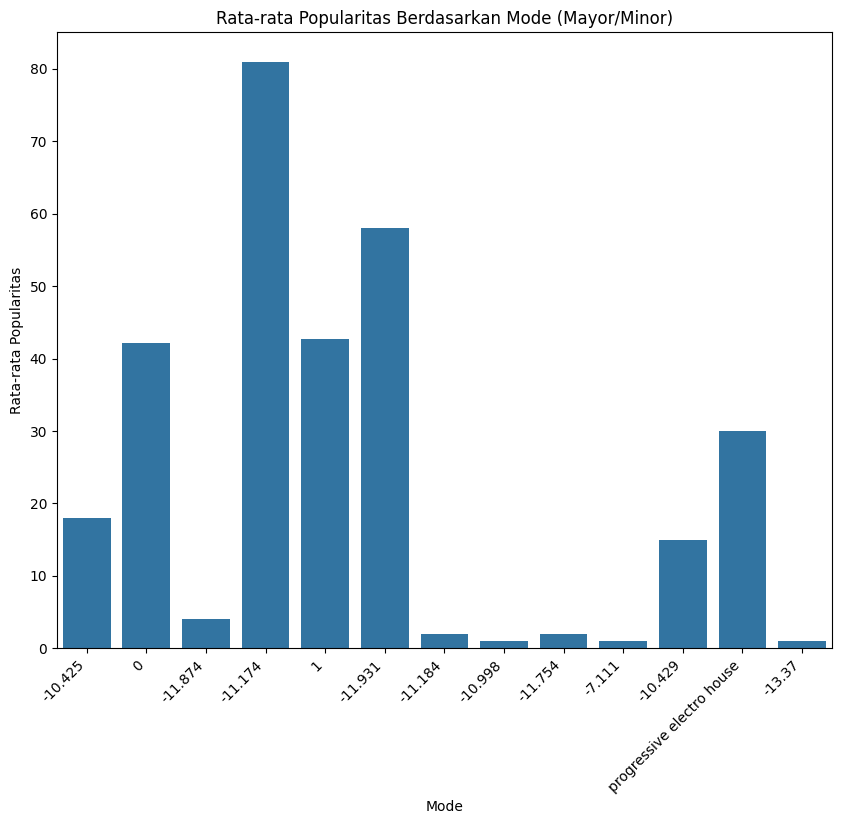

In [ ]:
# Plot distribusi popularitas berdasarkan mode
plt.figure(figsize=(10, 8))
sns.barplot(x="mode", y="avg_popularity", data=mode_popularity_pd)
plt.title("Rata-rata Popularitas Berdasarkan Mode (Mayor/Minor)")
plt.xlabel("Mode")
plt.ylabel("Rata-rata Popularitas")
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x sebesar 45 derajat dan rata kanan
plt.show()


Visualisasi ini menunjukkan bagaimana mode atau fitur musik tertentu berkorelasi dengan tingkat popularitasnya. Misalnya: Lagu dalam mode tertentu, seperti "1", cenderung lebih populer daripada lagu dalam mode lainnya. Lagu dalam kategori tertentu, seperti "progressive electro house", juga cukup populer.